In [1]:
martini2= [105,75,15,5,20,130,200,105,75,15,5,20,130,175,260,90,185,200,200,200,200,225,200,100,100,100,260,80,120,200,200,200,200,200,230,170,155,200,200,200]
K_boltzmann = [1.28867059,5.661059458,1.245206503,5.076485092,5.421039491,1.557185528,1.938639895,
               1.289768048,1.438540753,4.957645528,5.863961859,5.435250012,1.557185342,7.843628387,
               6.103702367,1.344723432,6.088464154,4.900443822,5.435591931,6.892929403,6.502198579,2.248206583,5.638250653,1.474018311,2.399082086,2.665829516,1.283615204,5.59745385,5.693773202,1.691131757,6.61821624,6.618221496,6.618221496,6.583588862,2.117515328,6.466035917,7.280278184,1.782737205,6.517495727,2.189257519]
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.11587783],
       [0.11587783, 1.        ]])

In [169]:
martini_data = [95,93,160,180,170,130,84,117,95,153,135,87,115,74,92,95,99,99,55,42,103,129,137,72,117,84,96.5,94,103,155,61,71,47]
boltzmann_dist_data = [125.663706,73.8413927,119.3805039,114.6378421,120.9222999,116.238933,
                       84.82301227,108.3770019,32.78549324,94.24767528,124.0840892,89.67526512,111.7107208,70.72468218,92.70268831,28.27434755,98.94955378,153.9380343,50.26548217,53.40700105,25.13287108,111.5818678,123.9555317,69.11505445,95.97250557,117.6557956,92.69336142,34.55751887,102.1555248,149.1928888,62.83185286,70.7398918,53.40707502]
gaussian_dist_data = [122.1347568,73.39134034,122.4384606,118.050877,121.0347794,117.4133302,
                      83.6883298,104.0040409,33.31613666,113.5895066,125.1413646,85.48132898,
                      111.3852574,71.23714547,91.64029912,28.7881953,98.34443939,151.4579902,
                      49.56677413,53.33387722,33.59831125,112.3778997,124.1142382,70.41805097,
                      113.239885,83.6883298,92.36503846,28.58879239,98.17228412,149.8977137,
                      61.97353067,70.50855771,47.46694594]


# import numpy as np
# np.corrcoef(martini_data, boltzmann_dist_data)


import numpy as np
print("correlation of distance : martini2 vs boltzmann")
print(np.corrcoef(martini_data, boltzmann_dist_data))

print("correlation of distance : gaussian vs boltzmann")
print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : martini2 vs boltzmann
[[1.         0.60150358]
 [0.60150358 1.        ]]
correlation of distance : gaussian vs boltzmann
[[1.         0.97250744]
 [0.97250744 1.        ]]


In [170]:
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plot
import math
from scipy.optimize import curve_fit
%matplotlib inline

In [171]:
angle_parameters = pd.DataFrame()
angle_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [172]:
angle_dict = dict.fromkeys(['BB1_BB2_BB3','BB2_BB3_ASC1','BB3_ASC1_ASC2','BB3_ASC1_ASC4','ASC1_ASC2_ASC3',\
'ASC2_ASC1_ASC4','ASC2_ASC3_ASC4','ASC3_ASC4_ASC1','BB2_BB3_USC1','BB3_USC1_USC2','BB3_USC1_USC3','USC1_USC2_USC3',\
'USC1_USC2_USC3','USC2_USC1_USC3','USC2_USC3_USC1','BB2_BB3_GSC1','BB3_GSC1_GSC2','BB3_GSC1_GSC4','GSC1_GSC2_GSC3','GSC2_GSC1_GSC4',\
'GSC2_GSC3_GSC4','GSC3_GSC4_GSC1','BB2_BB3_CSC1','BB3_CSC1_CSC2','BB3_CSC1_CSC3','CSC1_CSC2_CSC3','CSC2_CSC1_CSC3',\
'CSC2_CSC3_CSC1','BB2_BB3_pBB1','BB3_pBB1_pBB2','ASC1_BB3_pBB1','USC1_BB3_pBB1','GSC1_BB3_pBB1','CSC1_BB3_pBB1'])

In [173]:
# df_Hmapped_angle_all = pd.read_csv('angle_final_allmolecules.csv')

# df_Hmapped_distance_7w0f = pd.read_csv('piRNA_simu_files/3O3I/dist_final.xvg')
# df_Hmapped_distance_all = pd.read_csv('dist_final_allmolecules.csv')

df_Hmapped_angle_all = pd.read_excel('/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/CG_Models/PDB_files/experimental_data_bonded_params.xlsx',
                                        sheet_name="all_bond_angle",engine="openpyxl")

In [174]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [175]:
BB1_BB2_BB3_Hmapped_angle_all = df_Hmapped_angle_all['BB1_BB2_BB3']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB3_ASC1_ASC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC2']
BB3_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC4']
ASC1_ASC2_ASC3_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_ASC2_ASC3']
ASC2_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC1_ASC4']
ASC2_ASC3_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC3_ASC4']
ASC3_ASC4_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['ASC3_ASC4_ASC1']
BB2_BB3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_USC1']
BB3_USC1_USC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC2']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
USC1_USC2_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC1_USC2_USC3']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
# USC2_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC1_USC3']
USC2_USC3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC3_USC1']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB2_BB3_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_GSC1']
BB3_GSC1_GSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC2']
BB3_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC4']
GSC1_GSC2_GSC3_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_GSC2_GSC3']
GSC2_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC1_GSC4']
GSC2_GSC3_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC3_GSC4']
GSC3_GSC4_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['GSC3_GSC4_GSC1']
BB2_BB3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_CSC1']
BB3_CSC1_CSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC2']
BB3_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC3']
CSC1_CSC2_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_CSC2_CSC3']
CSC2_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC1_CSC3']
CSC2_CSC3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC3_CSC1']
BB2_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_pBB1']
BB3_pBB1_pBB2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_pBB1_pBB2']
ASC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_BB3_pBB1']
USC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['USC1_BB3_pBB1']
GSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_BB3_pBB1']
CSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_BB3_pBB1']

In [176]:
BB2_BB3_USC1_Hmapped_angle_all

0     60.824
1     62.995
2     64.771
3     63.595
4     70.462
5     64.221
6     66.159
7     65.975
8     62.795
9     64.267
10    64.878
11    66.967
12    65.130
13    61.899
14    63.849
15    65.534
16    64.969
17    63.198
18    69.165
19    66.447
Name: BB2_BB3_USC1, dtype: float64

In [177]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)


In [178]:
import math
def harmonic_angle(theta, theta0, k):
    coslist = []
    for t in theta:
        coslist.append(math.cos(t) - math.cos(theta0))
    final_coslist = np.array(coslist)
    val = 0.5 * k * final_coslist ** 2
    return val

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 95.01070000000001
Mode: Raw data 94.24271857821232
Mode: Gauss-fitted 94.24271857821232


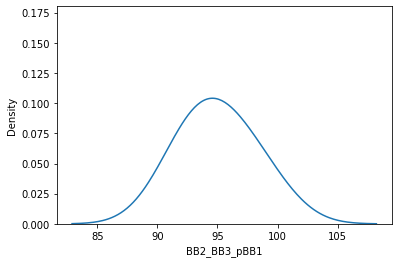

In [179]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  125.66370588071659
parameter K is:  0.7846143208951076


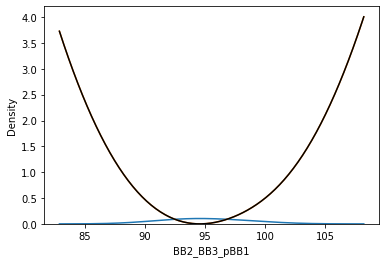

In [180]:

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[123, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2_Hmapped_angle_all
Mean: Raw data 70.04205
Mode: Raw data 66.77668468565548
Mode: Gauss-fitted 66.77668468565548


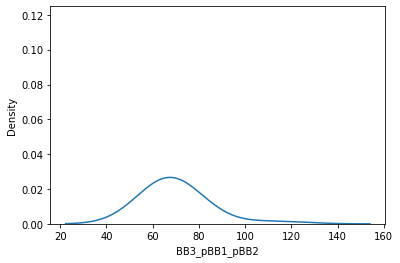

In [181]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  73.83451044459115
parameter K is:  3.841504382329749


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


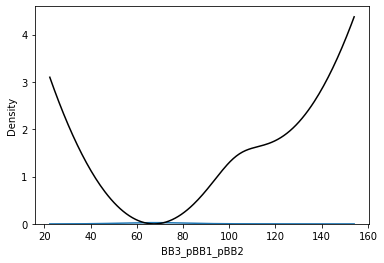

In [182]:

#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
# plt.plot(xdata,U,color='black')

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[74, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB3_pBB1_pBB2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 128.31765000000001
Mode: Raw data 123.71520120922072
Mode: Gauss-fitted 123.71520120922072


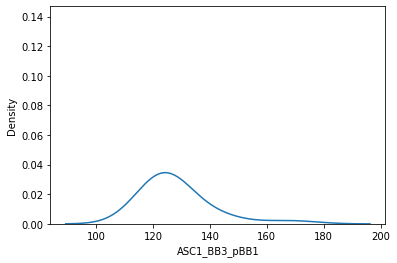

In [183]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  119.38062732069349
parameter K is:  0.9793499564124136


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


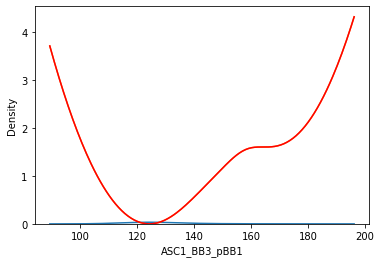

In [184]:

#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.8)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('ASC1_BB3_pBB1_Hmapped_angle_all')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 127.21820000000002
Mode: Raw data 121.5268076936716
Mode: Gauss-fitted 121.5268076936716


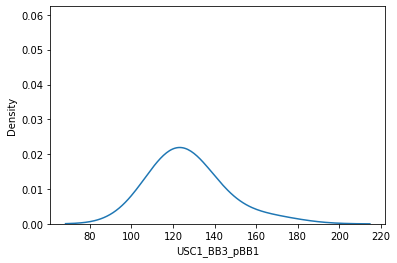

In [185]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  120.9344049381631
parameter K is:  3.6108575604049093


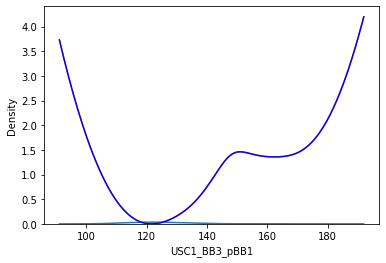

In [186]:

#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[120, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('USC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 127.01025
Mode: Raw data 123.03101190261665
Mode: Gauss-fitted 123.03101190261665


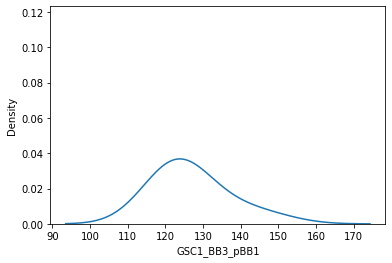

In [187]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.93849144792158
parameter K is:  3.3432568114495487


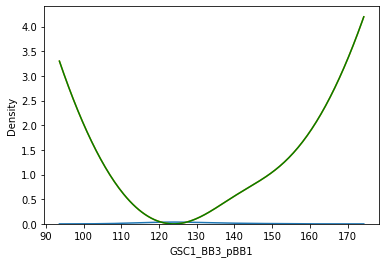

In [188]:

#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[121, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 120.55314999999999
Mode: Raw data 118.49091236429035
Mode: Gauss-fitted 118.49091236429035


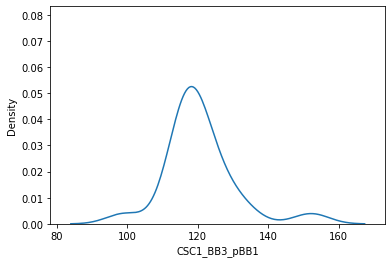

In [189]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  114.62934255893771
parameter K is:  4.086996350895703


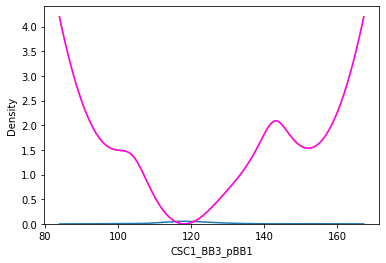

In [190]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[117, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('CSC1_BB3_pBB1_Hmapped_angle_all')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.92875000000001
Mode: Raw data 83.50219255231993
Mode: Gauss-fitted 83.50219255231993


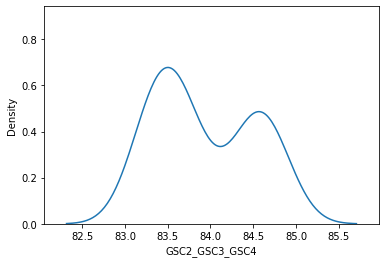

In [191]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  83.56140523979664
parameter K is:  4.864224638519841


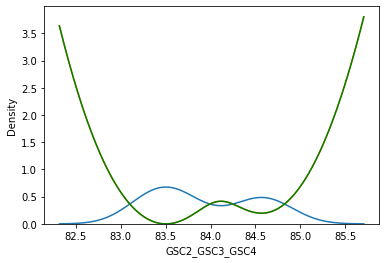

In [192]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[84, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC2_GSC3_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 95.01070000000001
Mode: Raw data 94.24271857821232
Mode: Gauss-fitted 94.24271857821232


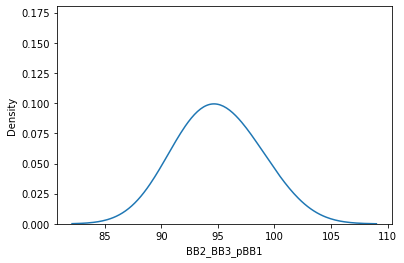

In [193]:
 # Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  119.3805203577022
parameter K is:  0.7759571571241319


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


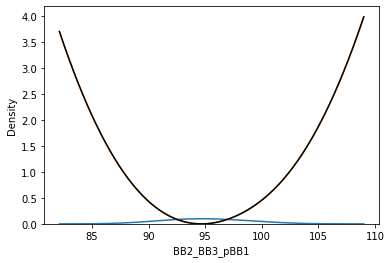

In [194]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1.1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2_Hmapped_angle_all
Mean: Raw data 70.04205
Mode: Raw data 66.77668468565548
Mode: Gauss-fitted 66.77668468565548


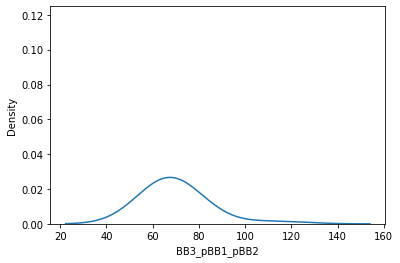

In [195]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_pBB1_pBB2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  75.39822424749762
parameter K is:  0.9930580130799793


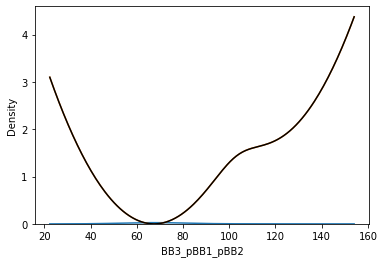

In [196]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[73, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_pBB1_pBB2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 128.31765000000001
Mode: Raw data 123.71520120922072
Mode: Gauss-fitted 123.71520120922072


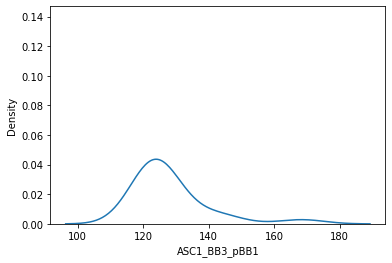

In [197]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.6)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  117.80966662939365
parameter K is:  4.001763350903285


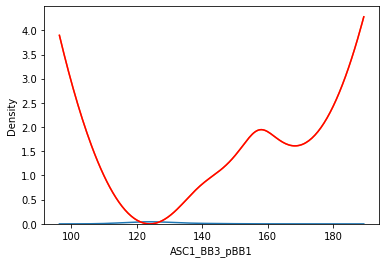

In [198]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.6)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 127.21820000000002
Mode: Raw data 121.5268076936716
Mode: Gauss-fitted 121.5268076936716


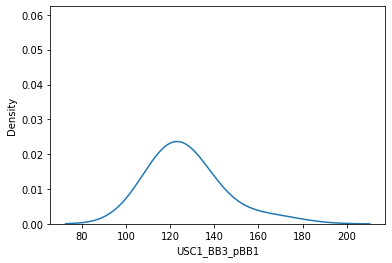

In [199]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  117.8175618335962
parameter K is:  3.623073647221581


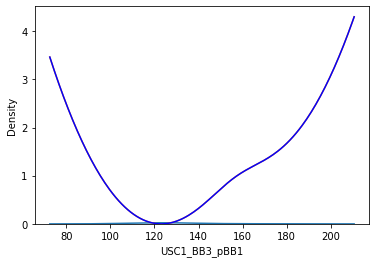

In [200]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[118, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 127.01025
Mode: Raw data 123.03101190261665
Mode: Gauss-fitted 123.03101190261665


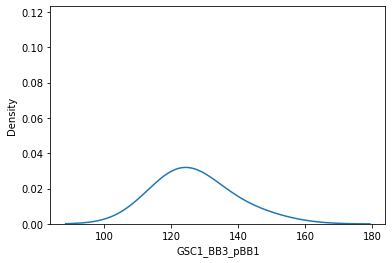

In [201]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.93560896677289
parameter K is:  3.3598920122797398


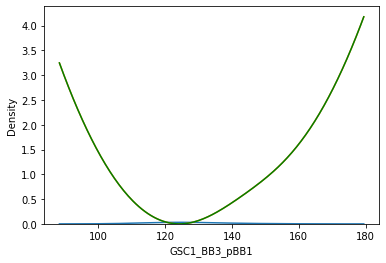

In [202]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[121, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 120.55314999999999
Mode: Raw data 118.49091236429035
Mode: Gauss-fitted 118.49091236429035


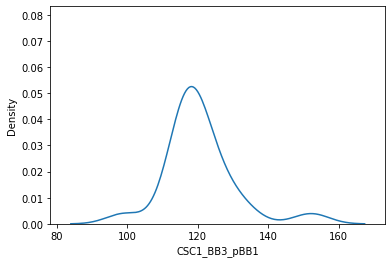

In [203]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  114.62934137577855
parameter K is:  4.086994489498332


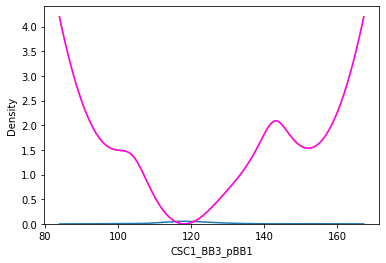

In [204]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[117, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_Hmapped_angle_all
Mean: Raw data 142.35195
Mode: Raw data 142.88005270078398
Mode: Gauss-fitted 142.88005270078398


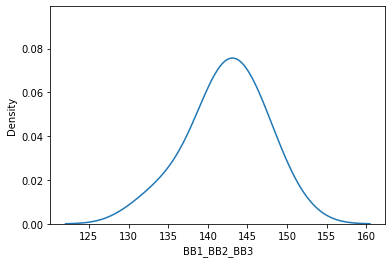

In [205]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_Hmapped_angle_all)
xmean = np.mean(BB1_BB2_BB3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB1_BB2_BB3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  106.8141467696489
parameter K is:  0.9467202298441588


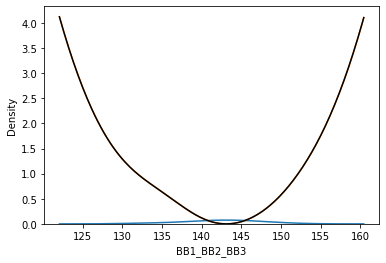

In [206]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[104, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB1_BB2_BB3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_ASC1_Hmapped_angle_all
Mean: Raw data 80.1759
Mode: Raw data 80.3205289485011
Mode: Gauss-fitted 80.3205289485011


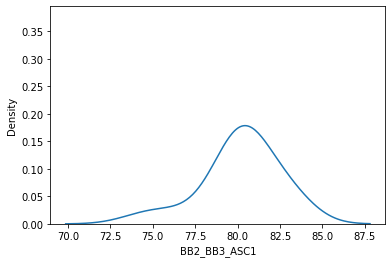

In [207]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_ASC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  33.01066897490125
parameter K is:  3.244529633860602


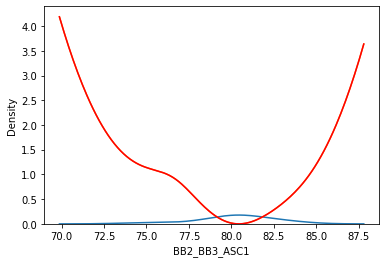

In [208]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_ASC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC2_Hmapped_angle_all
Mean: Raw data 114.36770000000001
Mode: Raw data 113.41066599991164
Mode: Gauss-fitted 113.41066599991164


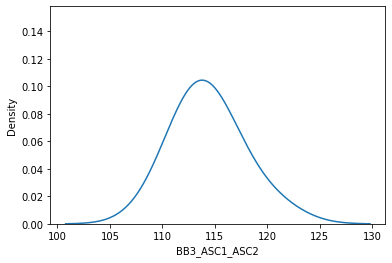

In [209]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC2_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_ASC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_ASC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  89.47522292016308
parameter K is:  3.6520119999444924


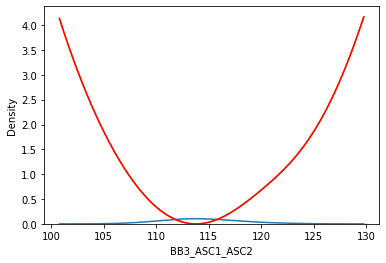

In [210]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[113, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_ASC1_ASC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC4_Hmapped_angle_all
Mean: Raw data 125.79499999999999
Mode: Raw data 126.88744840519374
Mode: Gauss-fitted 126.88744840519374


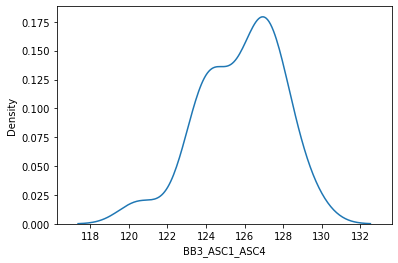

In [211]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  122.52211340151027
parameter K is:  0.9583677068846324


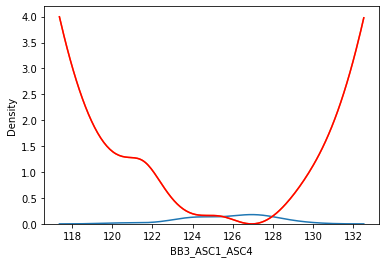

In [212]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[124, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_ASC1_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

ASC1_ASC2_ASC3_Hmapped_angle_all
Mean: Raw data 84.7681
Mode: Raw data 85.24633967331812
Mode: Gauss-fitted 85.24633967331812


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


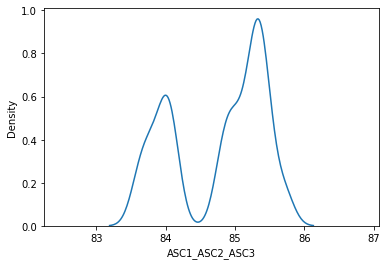

In [213]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_ASC3_Hmapped_angle_all)
xmean = np.mean(ASC1_ASC2_ASC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC2_ASC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_ASC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_ASC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  85.66165734764489
parameter K is:  16.012385444447947


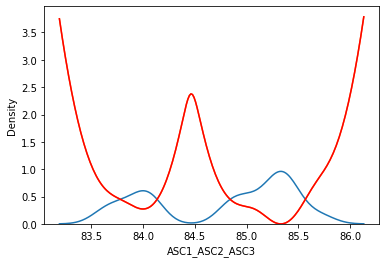

In [214]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[85.4, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC1_ASC2_ASC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC1_ASC4_Hmapped_angle_all
Mean: Raw data 112.03
Mode: Raw data 111.3358259462144
Mode: Gauss-fitted 111.3358259462144


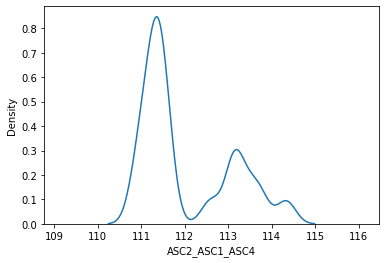

In [215]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC1_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC1_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  109.9557421814162
parameter K is:  0.7705974840613393


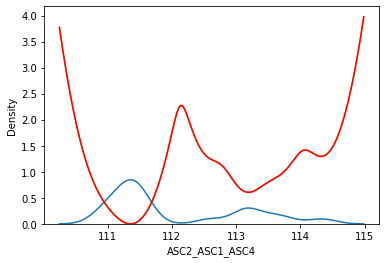

In [216]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[111, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC2_ASC1_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_ASC4_Hmapped_angle_all
Mean: Raw data 71.5452
Mode: Raw data 71.49271286242892
Mode: Gauss-fitted 71.49271286242892


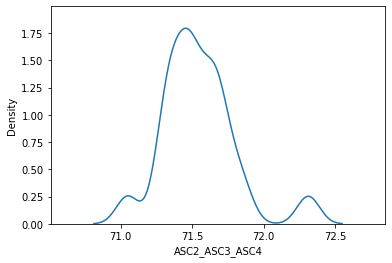

In [217]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC3_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC2_ASC3_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC3_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  71.36533772290362
parameter K is:  29.22004890697835


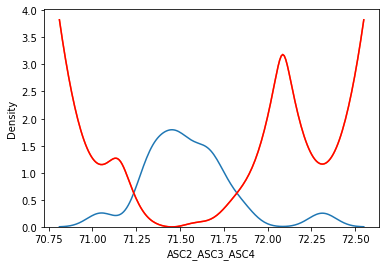

In [218]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[71, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC2_ASC3_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_ASC1_Hmapped_angle_all
Mean: Raw data 91.64540000000001
Mode: Raw data 91.8166715390704
Mode: Gauss-fitted 91.8166715390704


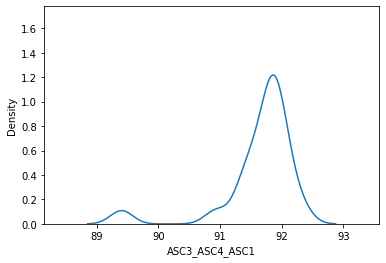

In [219]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_ASC1_Hmapped_angle_all)
xmean = np.mean(ASC3_ASC4_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC3_ASC4_ASC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_ASC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC3_ASC4_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  92.29968367658438
parameter K is:  9.080103429976122


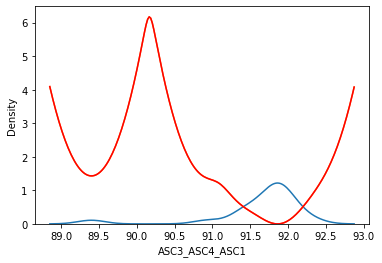

In [220]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[91.7, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC3_ASC4_ASC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_USC1_Hmapped_angle_all
Mean: Raw data 64.905
Mode: Raw data 64.65073005808595
Mode: Gauss-fitted 64.65073005808595


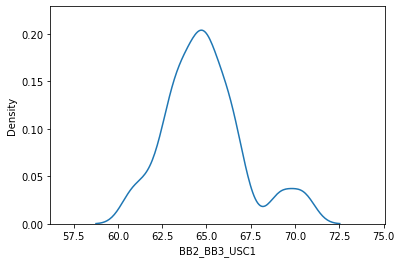

In [221]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_USC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  23.743992740633317
parameter K is:  2.7276549981382288


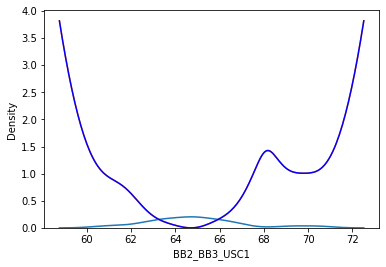

In [222]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[28, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_USC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC2_Hmapped_angle_all
Mean: Raw data 98.0541
Mode: Raw data 98.22038603436754
Mode: Gauss-fitted 98.22038603436754


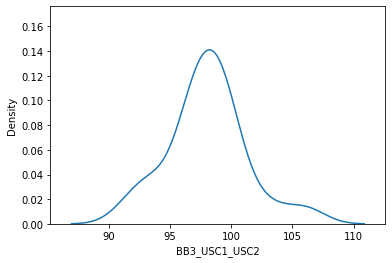

In [223]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC2_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_USC1_USC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_USC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  98.96065387681115
parameter K is:  3.6221183565416104


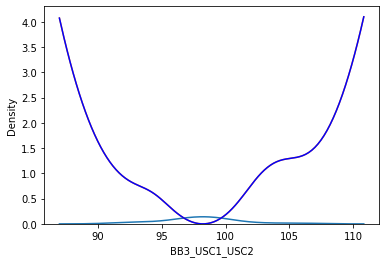

In [224]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[98.5, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_USC1_USC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC3_Hmapped_angle_all
Mean: Raw data 152.17839999999998
Mode: Raw data 152.19901738282363
Mode: Gauss-fitted 152.19901738282363


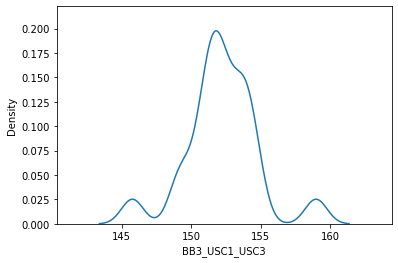

In [225]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_USC1_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  153.93803915339865
parameter K is:  0.9783903045030797


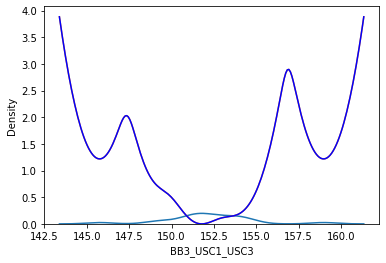

In [226]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[151.3, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])C1
angle_parameters_dict['Parameter'].append('BB3_USC1_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_USC3_Hmapped_angle_all
Mean: Raw data 62.6842
Mode: Raw data 62.884839767232364
Mode: Gauss-fitted 62.884839767232364


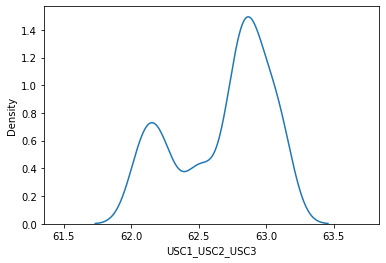

In [227]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_USC3_Hmapped_angle_all)
xmean = np.mean(USC1_USC2_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_USC2_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_USC2_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  50.26548223215517
parameter K is:  22.918769261610052


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


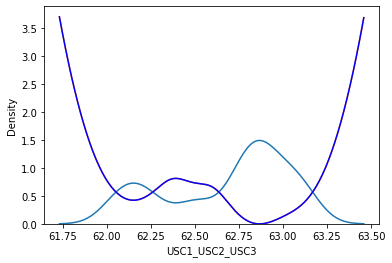

In [228]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[49.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC1_USC2_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [229]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(USC2_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC2_USC1_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC1_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

NameError: name 'USC2_USC1_USC3_Hmapped_angle_all' is not defined

In [230]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[77.1, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC2_USC1_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

NameError: name 'USC2_USC1_USC3_Hmapped_angle_all' is not defined

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC2_USC3_USC1_Hmapped_angle_all
Mean: Raw data 46.8265
Mode: Raw data 46.240371110206866
Mode: Gauss-fitted 46.240371110206866


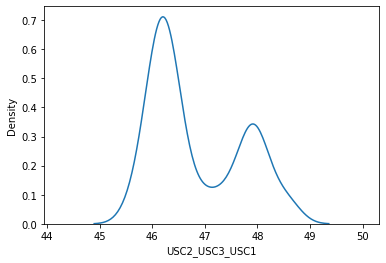

In [232]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_USC1_Hmapped_angle_all)
xmean = np.mean(USC2_USC3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC2_USC3_USC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_USC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  52.35313118707932
parameter K is:  6.741895005167913


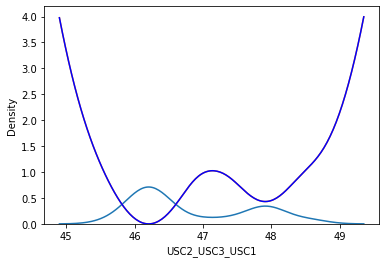

In [233]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[53.2, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC2_USC3_USC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_GSC1_Hmapped_angle_all
Mean: Raw data 80.90520000000001
Mode: Raw data 80.3365751635519
Mode: Gauss-fitted 80.3365751635519


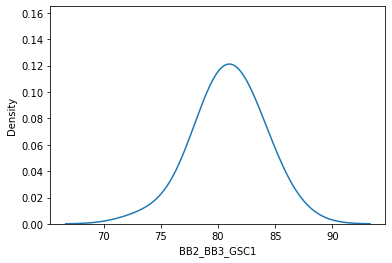

In [234]:
# plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
 
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1.0)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  34.557517329715324
parameter K is:  0.9643890576237698


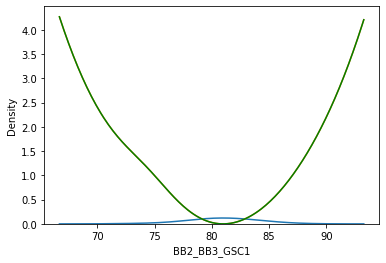

In [235]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[32, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_GSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC2_Hmapped_angle_all
Mean: Raw data 111.23254999999999
Mode: Raw data 109.38388790306719
Mode: Gauss-fitted 109.38388790306719


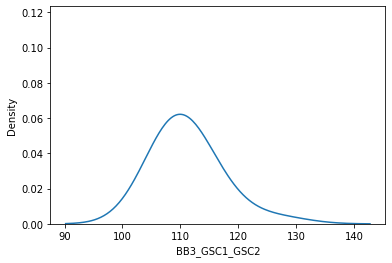

In [236]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC2_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_GSC1_GSC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_GSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  111.59687154102335
parameter K is:  3.6724335493046434


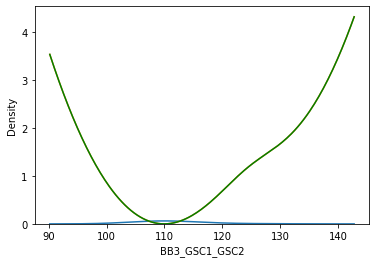

In [237]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[112, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_GSC1_GSC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 126.90899999999999
Mode: Raw data 128.2702569961605
Mode: Gauss-fitted 128.2702569961605


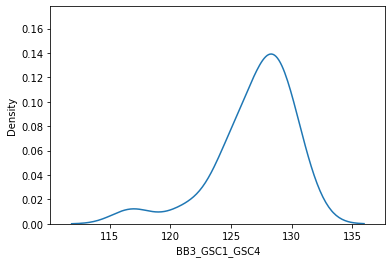

In [238]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_GSC1_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  124.07187501678334
parameter K is:  3.605605146837759


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


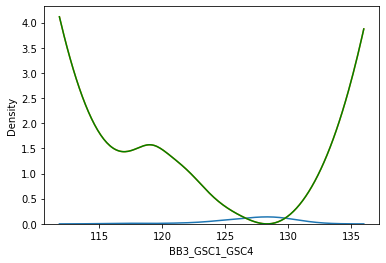

In [239]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[124, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_GSC1_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3_Hmapped_angle_all
Mean: Raw data 70.37024999999998
Mode: Raw data 70.56251738940794
Mode: Gauss-fitted 70.56251738940794


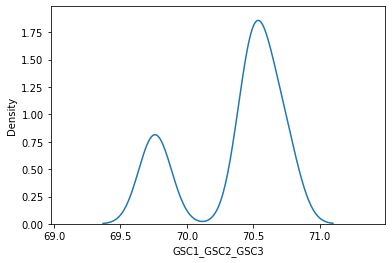

In [240]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_GSC3_Hmapped_angle_all)
xmean = np.mean(GSC1_GSC2_GSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC1_GSC2_GSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_GSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_GSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  70.39520175877088
parameter K is:  10.270986042596553


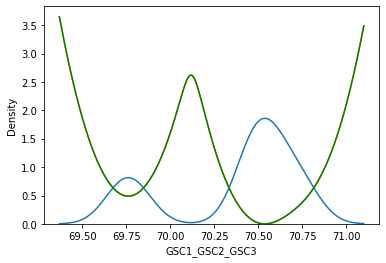

In [241]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC1_GSC2_GSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

GSC2_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 114.18820000000001
Mode: Raw data 113.54106653988988
Mode: Gauss-fitted 113.54106653988988


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


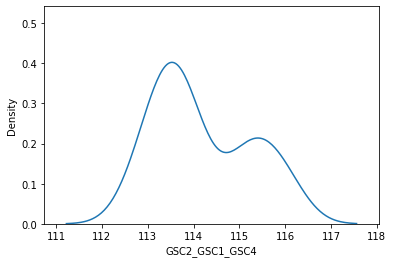

In [242]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC1_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC1_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  119.38049566521202
parameter K is:  0.8232892768395327


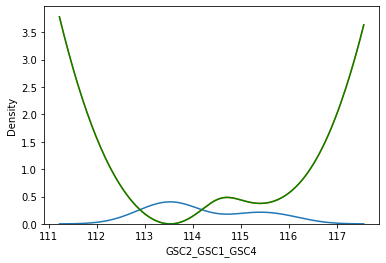

In [243]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[113.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC2_GSC1_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.92875000000001
Mode: Raw data 83.50219255231993
Mode: Gauss-fitted 83.50219255231993


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


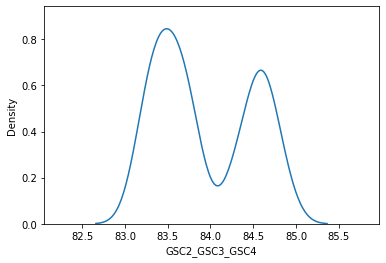

In [244]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])
angle_parameters_dict['Parameter'].append('GSC2_GSC3_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  83.64141525485718
parameter K is:  6.427235987321856


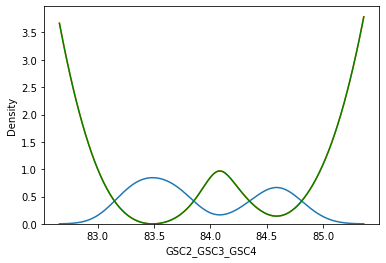

In [245]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[83.6, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_GSC1_Hmapped_angle_all
Mean: Raw data 91.49865000000001
Mode: Raw data 92.38180050982587
Mode: Gauss-fitted 92.38180050982587


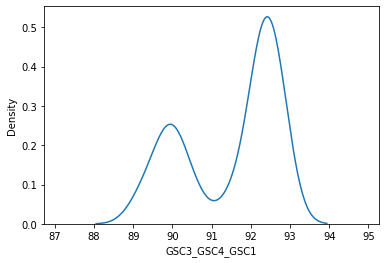

In [246]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_GSC1_Hmapped_angle_all)
xmean = np.mean(GSC3_GSC4_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC3_GSC4_GSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_GSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC3_GSC4_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  92.44186822716901
parameter K is:  4.230364868866089


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


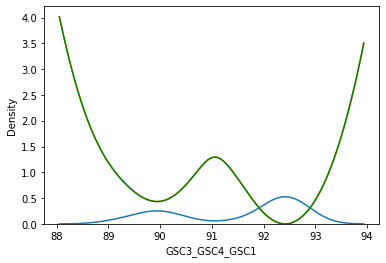

In [247]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[92.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC3_GSC4_GSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_Hmapped_angle_all
Mean: Raw data 63.95625
Mode: Raw data 64.53075168741941
Mode: Gauss-fitted 64.53075168741941


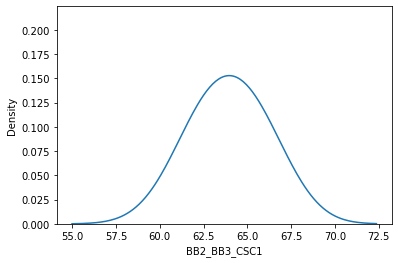

In [248]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_CSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  33.05900314338035
parameter K is:  3.2131549107781225


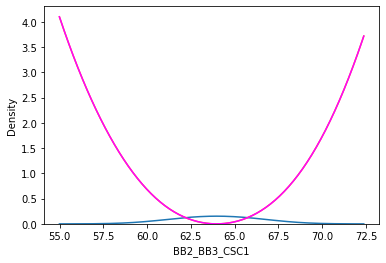

In [249]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[28.6, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_CSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC2_Hmapped_angle_all
Mean: Raw data 95.87814999999998
Mode: Raw data 96.21123533531909
Mode: Gauss-fitted 96.21123533531909


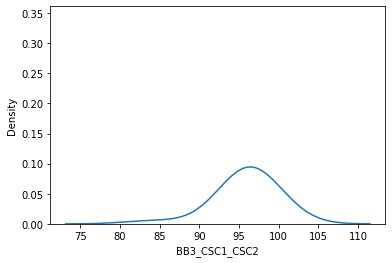

In [250]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC2_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_CSC1_CSC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC2_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_CSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  98.97949910919625
parameter K is:  3.9484666832618234


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


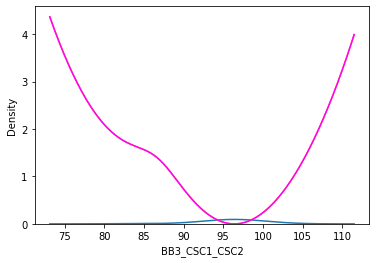

In [251]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[98, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_CSC1_CSC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 150.26085
Mode: Raw data 149.62719167878996
Mode: Gauss-fitted 149.62719167878996


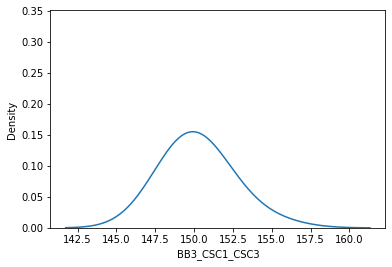

In [252]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_CSC1_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  149.35159297118372
parameter K is:  3.5444507618960808


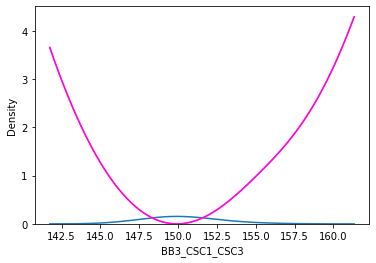

In [253]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[149, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_CSC1_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_CSC2_CSC3_Hmapped_angle_all
Mean: Raw data 62.03254999999999
Mode: Raw data 62.050626017895894
Mode: Gauss-fitted 62.050626017895894


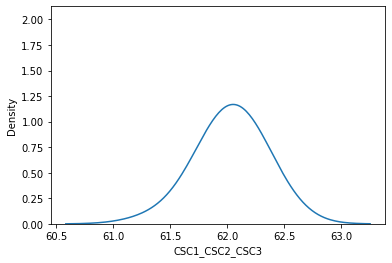

In [254]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC1_CSC2_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(CSC1_CSC2_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_CSC2_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  61.66965665768753
parameter K is:  9.200437196001714


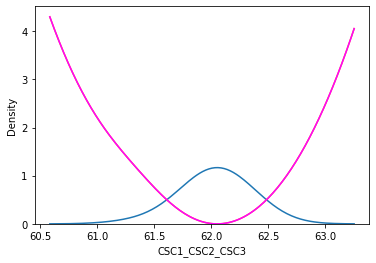

In [255]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[62, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC1_CSC2_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 70.23665000000001
Mode: Raw data 70.32431062649397
Mode: Gauss-fitted 70.32431062649397


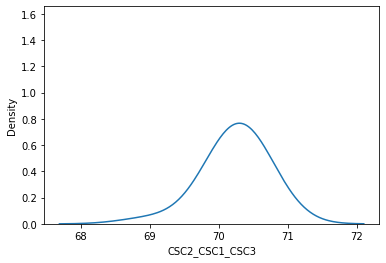

In [256]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC1_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC1_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  70.54575052962507
parameter K is:  4.986327948607415


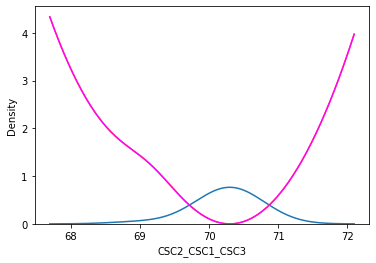

In [257]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70.4, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC2_CSC1_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_CSC1_Hmapped_angle_all
Mean: Raw data 47.730799999999995
Mode: Raw data 47.72655916943871
Mode: Gauss-fitted 47.72655916943871


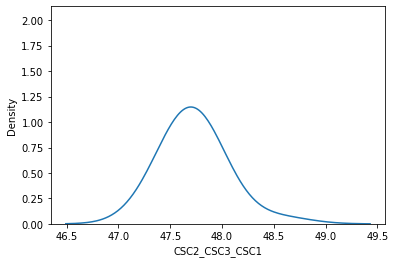

In [258]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_CSC1_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC3_CSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_CSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  48.244073246928124
parameter K is:  7.945983311016842


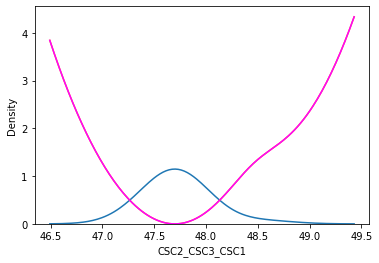

In [259]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[47.7, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC2_CSC3_CSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [267]:
angle_parameters['Parameter'] = angle_parameters_dict['Parameter']
angle_parameters['raw data mean value'] = angle_parameters_dict['raw data mean value']
angle_parameters['raw data mode value gaussian-fitted mode value'] = angle_parameters_dict['raw data mode value gaussian-fitted mode value']
angle_parameters['Seed value obtained using BOltzmann inversion'] = angle_parameters_dict['Seed value obtained using BOltzmann inversion']
angle_parameters['K from boltzmann inversion'] = angle_parameters_dict['K from boltzmann inversion']
angle_parameters
# angle_parameters.to_csv("sirna_parameters_Angle.csv")
angle_parameters.to_csv("/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/CG_Models/PDB_files/all_parameters_angle.csv")

In [264]:
angle_parameters.to_csv("/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/CG_Models/PDB_files/all_parameters_angle.csv")

In [274]:
all_atom_boltzmann_param = [83.40949852,125.6636938,54.98072406,120.8989586,117.7980741,120.972,
                            119.3805208,102.0302666,33.13142841,114.7531447,124.0959381,
                            84.82300143,111.6624239,70.9715686,91.10618132,28.27433381,
                            98.94473131,153.9380345,50.26548222,53.40707347,
                            33.13589242,111.4960632,124.0503631,70.62556709,113.0971024,
                            113.0971024,91.10602856,28.27433369,98.97854623,149.2152809,
                            62.83177406,70.71445057,48.70298535,125.6637059,69.11503811,
                            119.3805203,114.6465835,124.1300498,119.3805208]

experimental_data_boltzmann = [83.5614052397967,125.663705880717,73.8345104445911,\
                               119.380627320694,120.934404938163,120.938491447922,
                               114.629342558938,106.814146769649,33.0106689749012,\
                               89.4752229201631,
                               122.52211340151,85.6616573476449,109.955742181416,
                               71.3653377229036,\
                               92.2996836765844,23.7439927406333,98.9606538768112,\
                               153.938039153399,50.2654822321552,52.3531311870793,\
                               34.5575173297153,111.596871541023,124.071875016783,
                               70.3952017587709,119.380495665212,119.380495665212,
                               92.441868227169,33.0590031433803,98.9794991091963,
                               149.351592971184,61.6696566576875,70.5457505296251,
                               48.2440732469281,119.380520357702,75.3982242474976,
                               117.809666629394,117.817561833596,120.935608966773,
                               114.629341375779]
# import numpy as np
print("correlation of angle : all_atom vs experimental")
print(np.corrcoef(all_atom_boltzmann_param, experimental_data_boltzmann))


correlation of angle : all_atom vs experimental
[[1.         0.98508555]
 [0.98508555 1.        ]]


In [268]:
angle_parameters

,Parameter,raw data mean value,raw data mode value gaussian-fitted mode value,Seed value obtained using BOltzmann inversion,K from boltzmann inversion
0,BB2_BB3_pBB1,95.01070,94.242719,125.663706,0.784614
1,BB3_pBB1_pBB2,70.04205,66.776685,73.834510,3.841504
2,ASC1_BB3_pBB1_Hmapped_angle_all,128.31765,123.715201,119.380627,0.979350
3,USC1_BB3_pBB1,127.21820,121.526808,120.934405,3.610858
4,GSC1_BB3_pBB1,127.01025,123.031012,120.938491,3.343257
5,CSC1_BB3_pBB1_Hmapped_angle_all,120.55315,118.490912,114.629343,4.086996
6,GSC2_GSC3_GSC4,83.92875,83.502193,83.561405,4.864225
7,BB2_BB3_pBB1,95.01070,94.242719,119.380520,0.775957
8,BB3_pBB1_pBB2,70.04205,66.776685,75.398224,0.993058
9,ASC1_BB3_pBB1,128.31765,123.715201,117.809667,4.001763
